# Содержание
1.1 Инициализация

1.1.1 Загрузка данных

1.1.2 Исследование исходных данных

1.2 Обработка пропущенных значений

1.3 Коррекция типов данных

1.4 Исследование основных параметров

1.5 Изучение и обработка выбросов

1.6 Исследование основных факторов продолжительности поездки

1.7 Общий вывод

# Инициализация проекта

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('D:/PythonWork/Machine learning and big data/data/trip_duration_task.csv', delimiter=',', encoding='utf-8')

# Исследование исходных данных

Датасет содержит следующие поля:
* `id` - уникальный идентификатор поездки
* `vendor_id` - идентификатор поставщика услуг
* `pickup_datetime` - дата и время начала поездки
* `dropoff-datetime` - дата и время конца поездки
* `passanger_count` - количество пассажиров в машине
* `pickup_longitude` - географическая долгота начала поездки
* `pickup_latitude` - географическая широта начала поездки
* `dropoff_longitude` - географическая долгота конца поездки
* `dropoff_latitude` - географическая широта конца поездки
* `trip_duration` - продолжительность поездки в секундах


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 729322 non-null  object 
 1   vendor_id          727135 non-null  float64
 2   pickup_datetime    729322 non-null  object 
 3   dropoff_datetime   729322 non-null  object 
 4   passenger_count    729322 non-null  int64  
 5   pickup_longitude   729322 non-null  float64
 6   pickup_latitude    727475 non-null  float64
 7   dropoff_longitude  729322 non-null  float64
 8   dropoff_latitude   729322 non-null  float64
 9   trip_duration      729322 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 55.6+ MB


In [4]:
data.head(20)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,id1080784,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,id0889885,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,id0857912,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,id3744273,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,id0232939,1.0,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848
5,id1918069,2.0,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,1455
6,id2429028,1.0,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,397
7,id1663798,2.0,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,1101
8,id2436943,2.0,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,1886
9,id2933909,1.0,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,1429


In [5]:
# Проверка дубликатов
print(data.duplicated().sum())

0


Дубликатов нет, поскольку у каждой поездки уникальный id.

In [6]:
# Проверка на наличие пропущенных значений
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

vendor_id            0.299868
pickup_latitude      0.253249
id                   0.000000
pickup_datetime      0.000000
passenger_count      0.000000
dropoff_datetime     0.000000
pickup_longitude     0.000000
dropoff_longitude    0.000000
dropoff_latitude     0.000000
trip_duration        0.000000
dtype: float64

Пропущенные значения есть в столбцах `vendor_id` и `pickup_latitude`.

<b>Получили следующую характеристику исходных данных:</b>
* Пропущенные значения есть в столбцах `vendor_id` и `pickup_latitude`.
* `id`, `pickup_datetime` и `dropoff_datetime` необходимо заменить на STR, поскольку
они принимают строковые значения.
* Значения столбца `vendor_id` нужно привести к INT, т. к. все значения этого признака имеют нулевую дробную часть.

# Выводы и дальнейшие шаги

In [7]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,727135.000000,729322.000000,729322.000000,727475.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535377,1.662055,-73.973513,40.750917,-73.973422,40.751775,9.522291e+02
std,0.498747,1.312446,0.069754,0.033608,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737331,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754066,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768311,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


Необходимо обработать пропущенные значения и изменить тип данных некоторых столбцов.

## Обработка пропущенных значений

<b>Недостающие значения данных в следующих столбцах:</b>

* `vendor_id`
* `pickup_latitude`

Заполним пропуски столбца `vendor_id` значением 1, присвоив данные перевозки первой транспортной компании.

In [8]:
data.fillna({'vendor_id' : 0}, inplace = True)
data['vendor_id'] = data['vendor_id'].replace(0, 1)
data['vendor_id'].value_counts()

vendor_id
2.0    389291
1.0    340031
Name: count, dtype: int64

Заполним пропуски столбца `pickup_latitude` средним значением.

In [9]:
data.fillna({'pickup_latitude': data['pickup_latitude'].mean()}, inplace=True)

## Коррекция типов данных

In [10]:
data['vendor_id'] = data['vendor_id'].astype(int)
fields_to_str = ['id', 'pickup_datetime', 'dropoff_datetime']
for f in fields_to_str:
    data[f] = data[f].astype(str)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 729322 non-null  object 
 1   vendor_id          729322 non-null  int64  
 2   pickup_datetime    729322 non-null  object 
 3   dropoff_datetime   729322 non-null  object 
 4   passenger_count    729322 non-null  int64  
 5   pickup_longitude   729322 non-null  float64
 6   pickup_latitude    729322 non-null  float64
 7   dropoff_longitude  729322 non-null  float64
 8   dropoff_latitude   729322 non-null  float64
 9   trip_duration      729322 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 55.6+ MB


In [11]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.533771,1.662055,-73.973513,40.750917,-73.973422,40.751775,9.522291e+02
std,0.498859,1.312446,0.069754,0.033565,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737400,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.753956,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768269,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


## Обогащение данных

Для удобства обработки данных введем новую характеристику - приблизительную длину маршрута `route_len` в километрах.

In [12]:
x0, y0 = data['pickup_longitude'], data['pickup_latitude']
x1, y1 = data['dropoff_longitude'], data['dropoff_latitude']
data['route_len'] = ((x1 - x0) ** 2 + (y1 - y0) ** 2) ** 0.5 * 111
data['route_len']

0         1.397743
1         4.148155
2         8.070991
3         2.383467
4         4.802338
            ...   
729317    1.475886
729318    0.801741
729319    2.309847
729320    0.979403
729321    7.250415
Name: route_len, Length: 729322, dtype: float64

Также добавим столбец с номером месяца `month`.

In [13]:
pdt = pd.to_datetime(data['pickup_datetime'])
data['month'] = pdt.dt.month
data['month']

0         2
1         3
2         2
3         1
4         2
         ..
729317    5
729318    2
729319    4
729320    6
729321    1
Name: month, Length: 729322, dtype: int32

И столбец с часом заказа такси `hour`.

In [14]:
data['hour'] = pdt.dt.hour
data['hour']

0         16
1         23
2         17
3          9
4          6
          ..
729317    13
729318     0
729319    18
729320     9
729321    17
Name: hour, Length: 729322, dtype: int32

In [15]:
data['week_day'] = pdt.dt.dayofweek
data['week_day']

0         0
1         4
2         6
3         1
4         2
         ..
729317    5
729318    0
729319    4
729320    6
729321    4
Name: week_day, Length: 729322, dtype: int32

# EDA
## Исследование основных параметров, определяющих продолжительность поездки на такси

<b>Исследуемые параметры:</b>

* Количество пассажиров
* приблизительная длина маршрута
* номер месяца
* продолжительность поездки

       passenger_count      route_len          month  trip_duration  \
count    729322.000000  729322.000000  729322.000000   7.293220e+05   
mean          1.662055       3.939040       3.518410   9.522291e+02   
std           1.312446       5.131717       1.680661   3.864626e+03   
min           0.000000       0.000000       1.000000   1.000000e+00   
25%           1.000000       1.399020       2.000000   3.970000e+02   
50%           1.000000       2.358224       4.000000   6.630000e+02   
75%           2.000000       4.265959       5.000000   1.075000e+03   
max           9.000000    1242.378890       6.000000   1.939736e+06   

            week_day  
count  729322.000000  
mean        3.049081  
std         1.954470  
min         0.000000  
25%         1.000000  
50%         3.000000  
75%         5.000000  
max         6.000000  


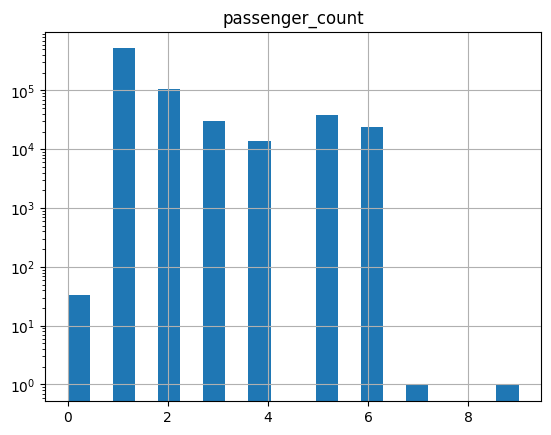

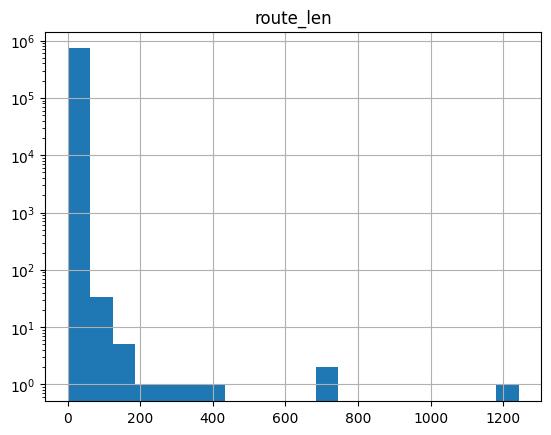

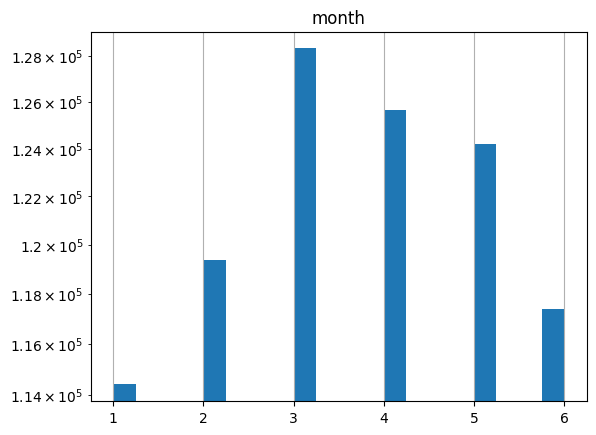

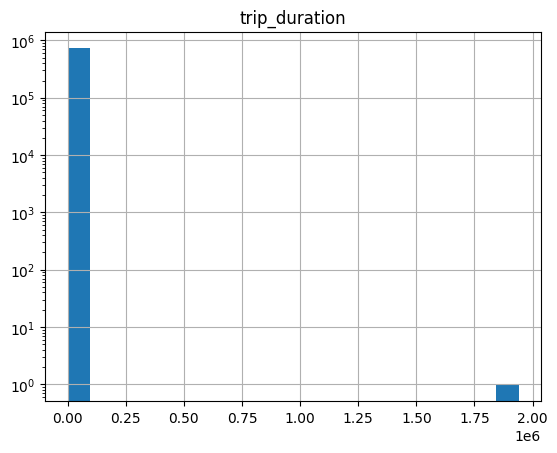

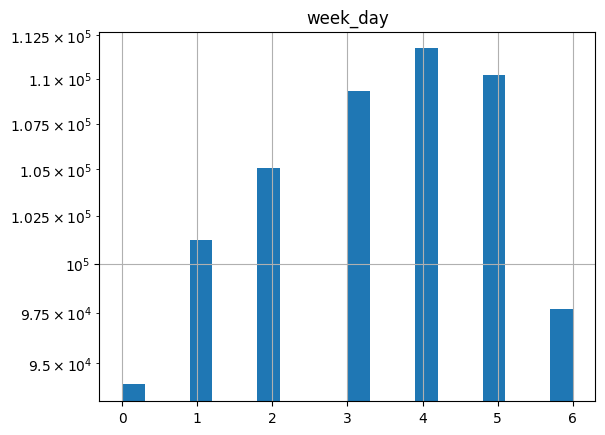

In [16]:
cols = ['passenger_count', 'route_len', 'month', 'trip_duration', 'week_day']
print(data.describe()[cols])
for c in cols:
    data.hist(c, bins=20, log=True)
    plt.show()

Столбцы, имеющие выбросы: `passenger_count`, `route_len` и `trip_duration`.

## Изучение и обработка выбросов

Создадим DataFrame без этих выбросов.


In [17]:
outlier = data[['passenger_count', 'route_len', 'trip_duration']]
outlier

,passenger_count,route_len,trip_duration
0,1,1.397743,400
1,2,4.148155,1100
2,2,8.070991,1635
3,6,2.383467,1141
4,1,4.802338,848
...,...,...,...
729317,2,1.475886,296
729318,1,0.801741,315
729319,1,2.309847,673
729320,1,0.979403,447


In [18]:
# Определить нижние пределы для выбросов
q1 = outlier.quantile(0.25)
print(q1)

passenger_count      1.00000
route_len            1.39902
trip_duration      397.00000
Name: 0.25, dtype: float64


In [19]:
# Определить верхние пределы для выбросов
q3 = outlier.quantile(0.75)
print(q3)

passenger_count       2.000000
route_len             4.265959
trip_duration      1075.000000
Name: 0.75, dtype: float64


In [20]:
# IQR-оценки
iqr = q3 - q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (q1 - 1.5 * iqr)) | (outlier > (q3 + 1.5 * iqr))).any(axis=1)]
# Удалим строки с нулевым количеством пассажиров
data_filtered = data_filtered.drop(data_filtered[data_filtered['passenger_count'] == 0].index)
# Удалим строки с нулевой длиной маршрута
data_filtered = data_filtered.drop(data_filtered[data_filtered['route_len'] < 0.2].index)
data_filtered

,passenger_count,route_len,trip_duration
0,1,1.397743,400
1,2,4.148155,1100
2,2,8.070991,1635
4,1,4.802338,848
5,2,3.116996,1455
...,...,...,...
729316,1,2.709620,449
729317,2,1.475886,296
729318,1,0.801741,315
729319,1,2.309847,673


In [21]:
# Копирование индексов
index_list = list(data_filtered.index.values)

In [22]:
# Будем хранить данные без выбросов в отдельном DataFrame
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,route_len,month,hour,week_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400,1.397743,2,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100,4.148155,3,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635,8.070991,2,17,6
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848,4.802338,2,6,2
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,1455,3.116996,2,18,6


Создадим гистограммы для отфильтрованных данных.

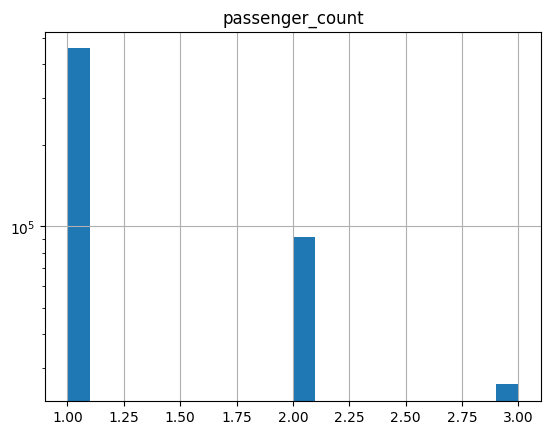

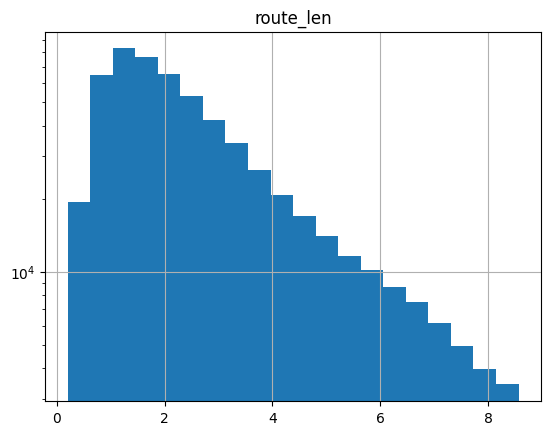

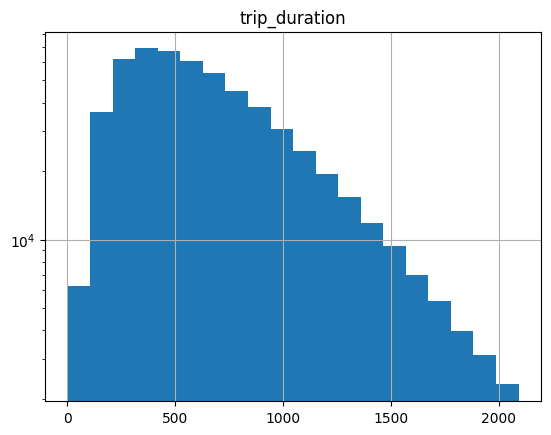

In [23]:
# Гистограммы с отфильтрованными выбросами
f_outlier = data_filtered[['passenger_count', 'route_len', 'trip_duration']]
for c in f_outlier:
    data_filtered.hist(c, bins=20, log=True)
    plt.show()

<b>Заключение:</b>

- Определили нижний и верхний пределы выбросов, определив 25-й и 75-й процентили. Затем нашли межквартильный размах. Использовали эту информацию для фильтрации выбросов. После удаления выбросов график выглядит более симметричным по сравнению с выбросами, и в данных легче наблюдать среднее значение, медиану и моду.


- Судя по гистограмме количества пассажиров, чаще всего ездят с 1-3 пассажирами в салоне.


- Судя по гистограммe длины маршрута, больше всего люди совершили поездок на расстояние 1-2 километра.

## Изучение основных параметров без выбросов

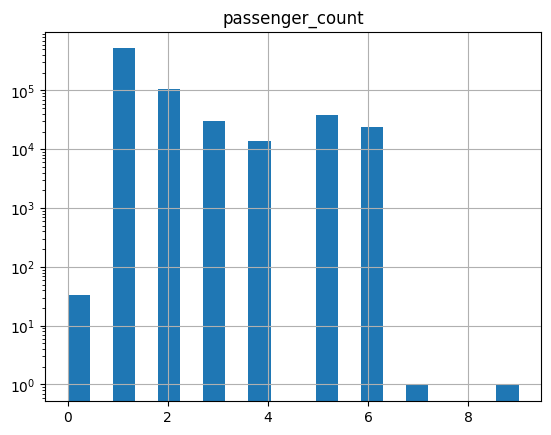

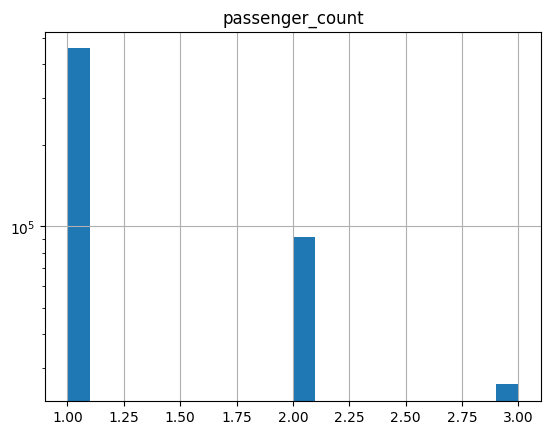

In [24]:
# Сравнение количества пассажиров с выбросами и без них
data.hist('passenger_count', bins=20, log=True)
plt.show()
data_filtered.hist('passenger_count', bins=20, log=True)
plt.show()

# **Заключение**:
- Выброс количества пассажиров был уменьшен с максимального 9 до 3.

- На гистограмме без выбросов видно, что чаще всего такси перевозит в салоне по одному человеку.

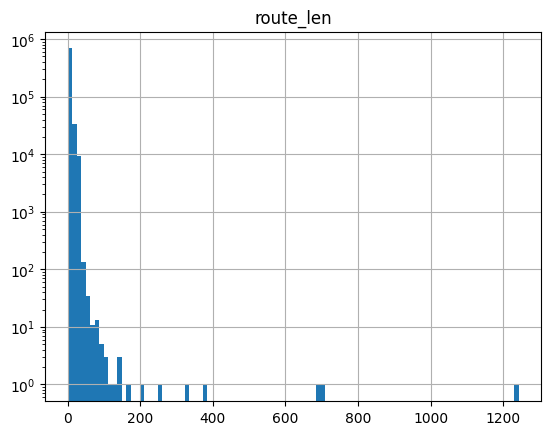

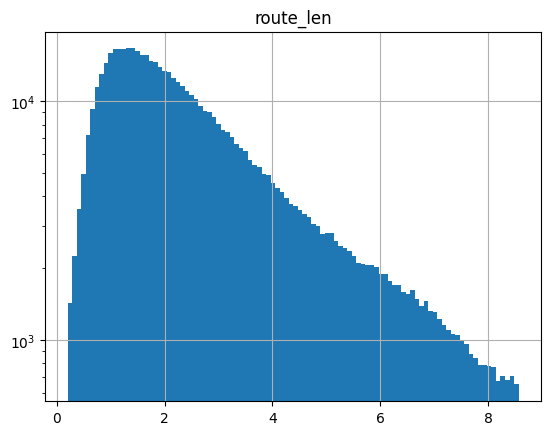

In [25]:
# Сравнение длины маршрута с выбросами и без них
data.hist('route_len', bins=100, log=True)
plt.show()
data_filtered.hist('route_len', bins=100, log=True)
plt.show()

# **Заключение**:
- Выброс длины маршрута был уменьшен с максимального 1250 до 9 км.

- На гистограмме без выбросов видно, что в основном поездка такси - 1,5 км.

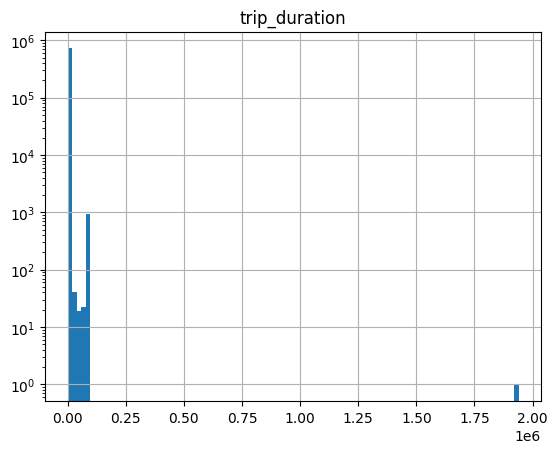

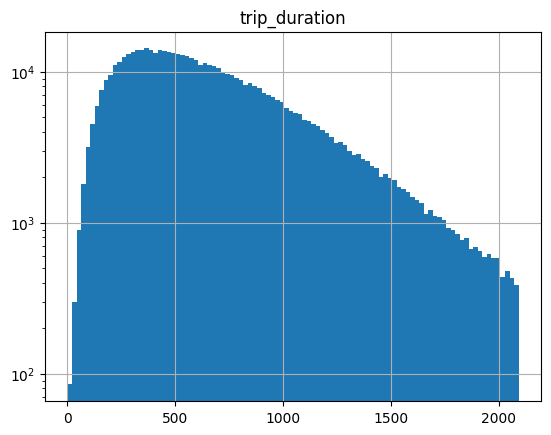

In [26]:
# Сравнение продолжительности поездки с выбросами и без них
data.hist('trip_duration', bins=100, log=True)
plt.show()
data_filtered.hist('trip_duration', bins=100, log=True)
plt.show()

# **Заключение**:
- Выброс длины маршрута был уменьшен с максимального 2 млн сек (очевидно, ошибочные данные) до 35 мин (2100 сек).

- На гистограмме без выбросов видно, что в основном длительность поездки на такси - 6-7 минут.

## Факторы, влияющие на продолжительность поездки в такси
Рассмотрим зависимость от следующих характеристик:
* количество пассажиров
* месяц перевозки
* длина маршрута
* id перевозчика
* час вызова такси

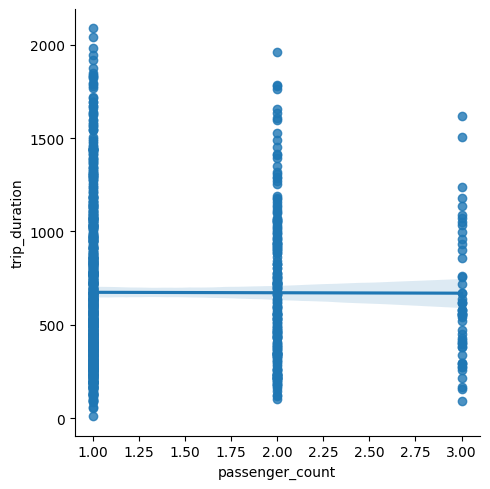

,trip_duration,passenger_count
trip_duration,1.000000,0.017824
passenger_count,0.017824,1.000000


In [27]:
sns.lmplot(x='passenger_count', y='trip_duration', data=data_filtered[:1000])
plt.show()
# Вычисление корреляции
pcount_taxi = data_filtered[['trip_duration', 'passenger_count']]
corr_pcount = pcount_taxi.corr(method='kendall')
corr_pcount

**Заключение** :
<br>
Количество перевозимых пассажиров никак не влияет на продолжительность поездки в такси.

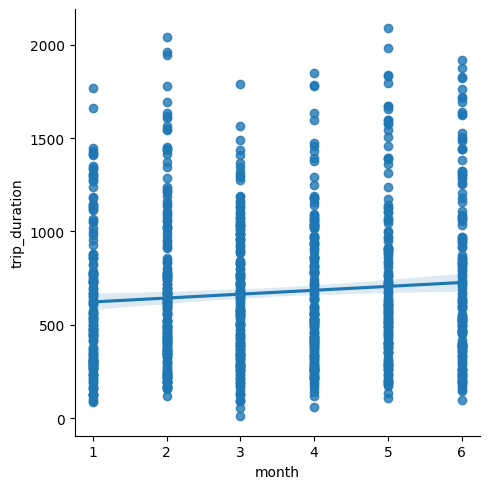

,trip_duration,month
trip_duration,1.000000,0.043921
month,0.043921,1.000000


In [28]:
sns.lmplot(x='month', y='trip_duration', data=data_filtered[:1000])
plt.show()
# Вычисление корреляции
month_taxi = data_filtered[['trip_duration', 'month']]
corr_month = month_taxi.corr(method='spearman')
corr_month

**Заключение** :
<br>
Месяц перевозки никак не влияет на продолжительность поездки в такси.

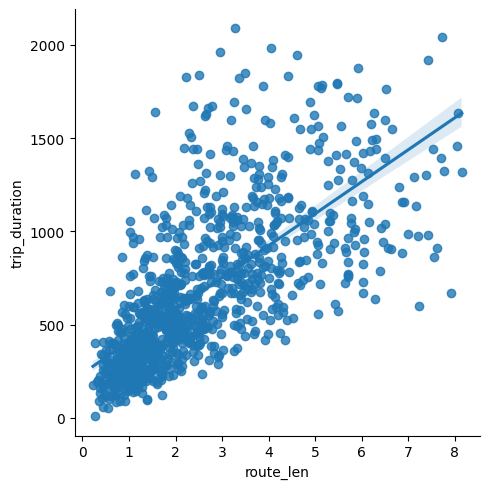

,trip_duration,route_len
trip_duration,1.000000,0.692186
route_len,0.692186,1.000000


In [29]:
sns.lmplot(x='route_len', y='trip_duration', data=data_filtered[:1000])
plt.show()
# Вычисление корреляции
len_taxi = data_filtered[['trip_duration', 'route_len']]
corr_len = len_taxi.corr()
corr_len

**Заключение** :
<br>
Высокий положительный коэффициент корреляции показывает прямую зависимость продолжительности поездки от длины маршрута. 

<Axes: title={'center': 'trip_duration'}, xlabel='vendor_id'>

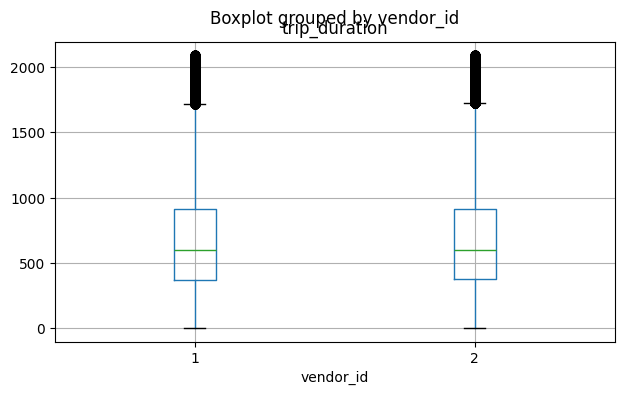

In [30]:
#  boxplot по столбцам 'trip_duration' и 'vendor_id'
data_filtered.boxplot(by ='vendor_id', column =['trip_duration'],figsize=(7,4), grid = True)

**Заключение** :
<br>
Id перевозчика никак не влияет на продолжительность поездки. Каждый из них добросовестно берет вызовы на любые расстояния.

<Axes: title={'center': 'trip_duration'}, xlabel='hour'>

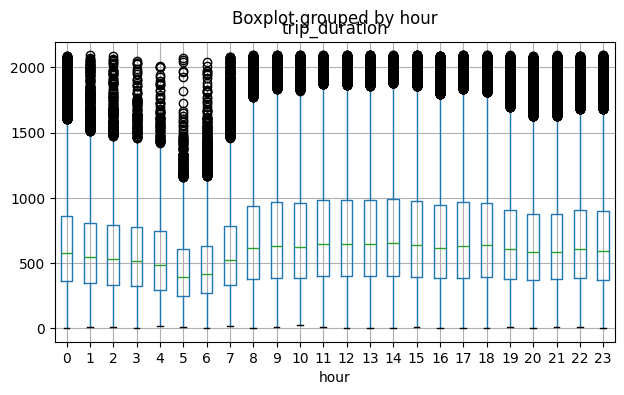

In [31]:
#  boxplot по столбцам 'trip_duration' и 'hour'
data_filtered.boxplot(by ='hour', column =['trip_duration'],figsize=(7,4), grid = True)

**Заключение** :
<br>
Заметим, что вызовы такси в 4-7 часов утра идут на меньшее расстояние, нежели в остальные часы суток.

<Axes: title={'center': 'trip_duration'}, xlabel='week_day'>

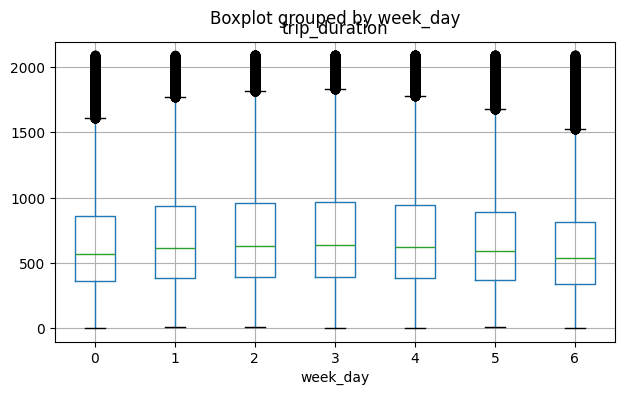

In [32]:
#  boxplot по столбцам 'trip_duration' и 'week_day'
data_filtered.boxplot(by ='week_day', column =['trip_duration'],figsize=(7,4), grid = True)

**Заключение** :
<br>
Заметим, что медианная продолжительность поездки наибольшая в четверг. Она уменьшается к воскресенью и увеличивается с понедельника. 

# Общие выводы:
В ходе лабораторной работы был обработан датасет, содержащий информацию о продолжительности поездки в такси.

Были изменены типы данных столбцов (с float на int);

Были устранены выбросы, находящиеся в столбцах `passenger_count`, `route_len`, `trip_duration`;

Построены гистограммы, отражающие распределения этих признаков;

Определены основные зависимости продолжительности поездки в такси - от длины маршрута (что очевидно) и от часа вызова такси.

In [34]:
data_filtered.to_csv('D:/PythonWork/Machine learning and big data/data/taxi_duration_processed.csv')